In [1]:
from loadData import load_data
from visualizeData import visualize_data_point, visualize_data_lengths, visualize_class_means, visualize_PC_variance
from processing import get_pattern_mean, get_time_steps, normalize
import numpy as np

In [2]:
TRAIN_DATA_POINTS = 270
TEST_DATA_POINTS = 370

In [3]:
train_data = load_data("data/ae.train", num_data_points=TRAIN_DATA_POINTS)
test_data = load_data("data/ae.test", num_data_points=TEST_DATA_POINTS)

Maximum number of rows of all datapoints: 26
Successfully created a NumPy array with shape: (270, 26, 12)
Maximum number of rows of all datapoints: 29
Successfully created a NumPy array with shape: (370, 29, 12)


In [4]:
train_time_steps, channels = train_data.shape[1:]
test_time_steps = test_data.shape[1]

5


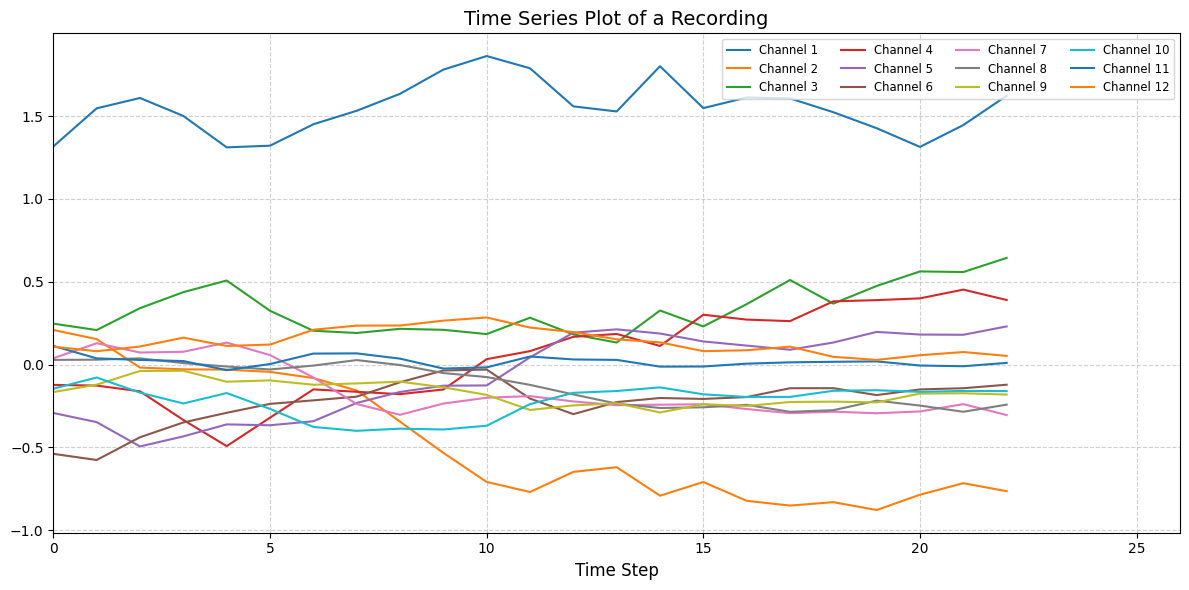

In [5]:
data_idx = np.random.randint(0, TRAIN_DATA_POINTS)
print(data_idx)

visualize_data_point(train_data[data_idx])

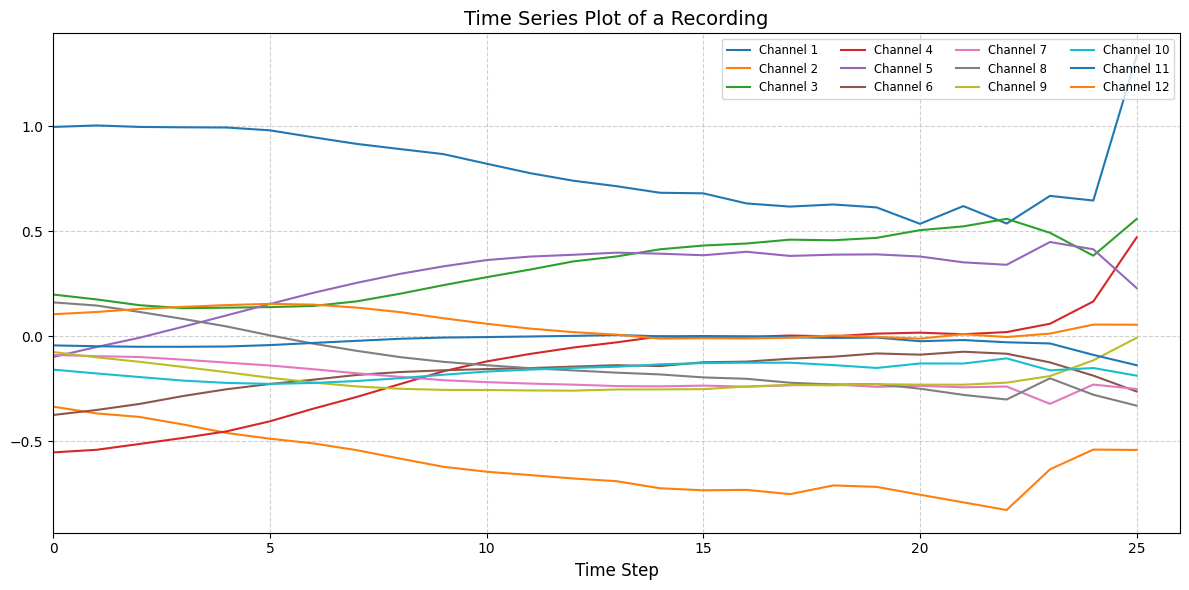

In [6]:
pattern_mean = get_pattern_mean(train_data)
visualize_data_point(pattern_mean)

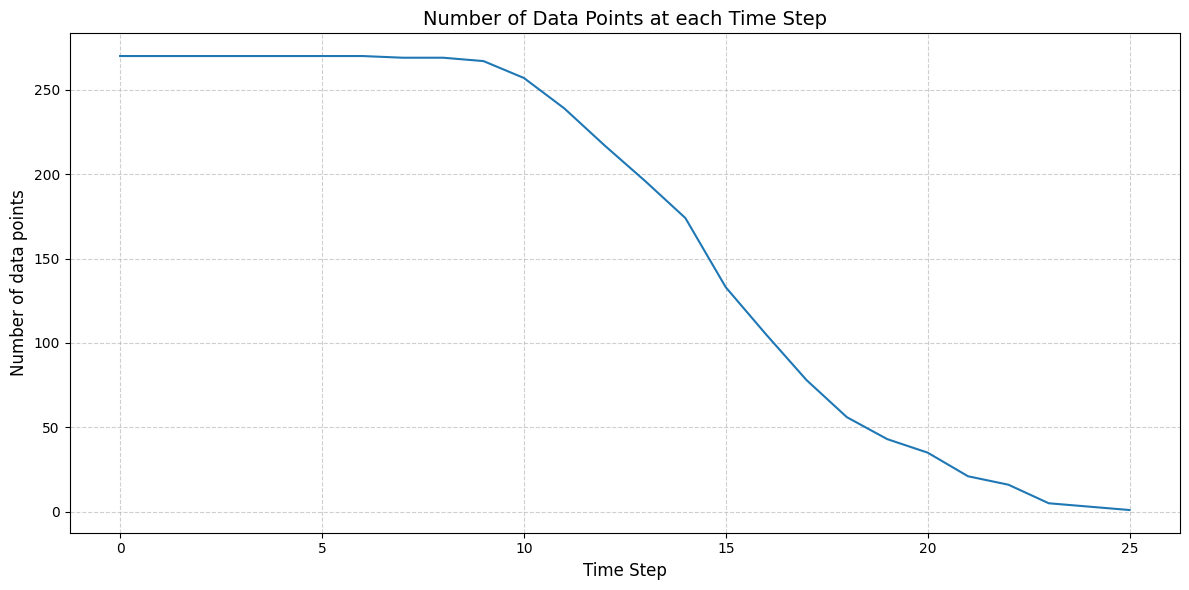

In [7]:
time_steps = get_time_steps(train_data)
visualize_data_lengths(time_steps)

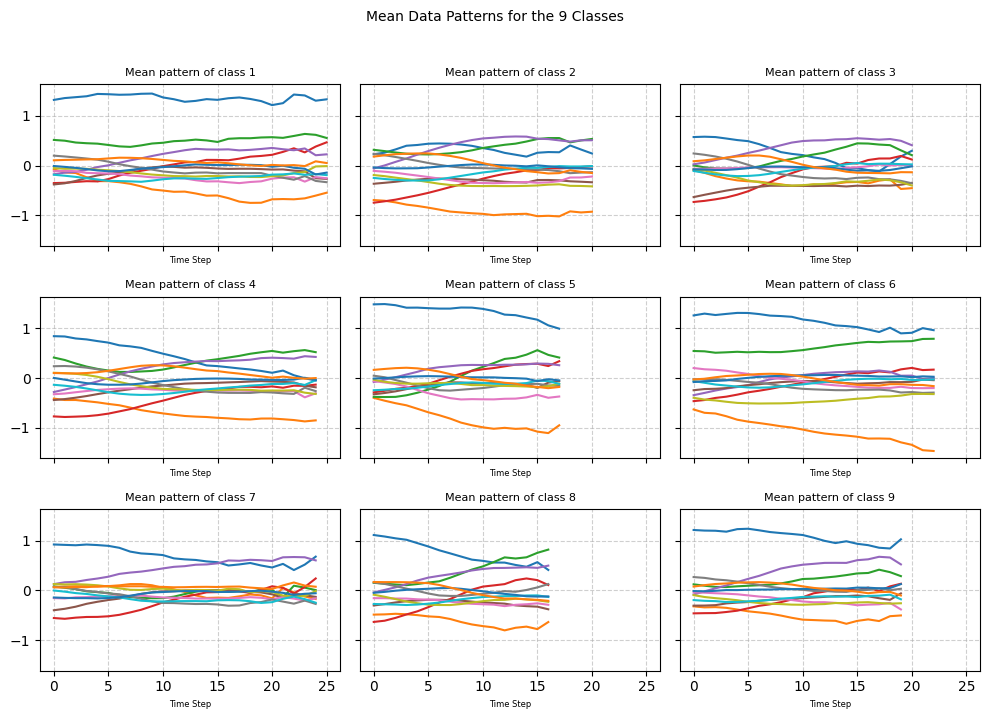

In [8]:
visualize_class_means(train_data)

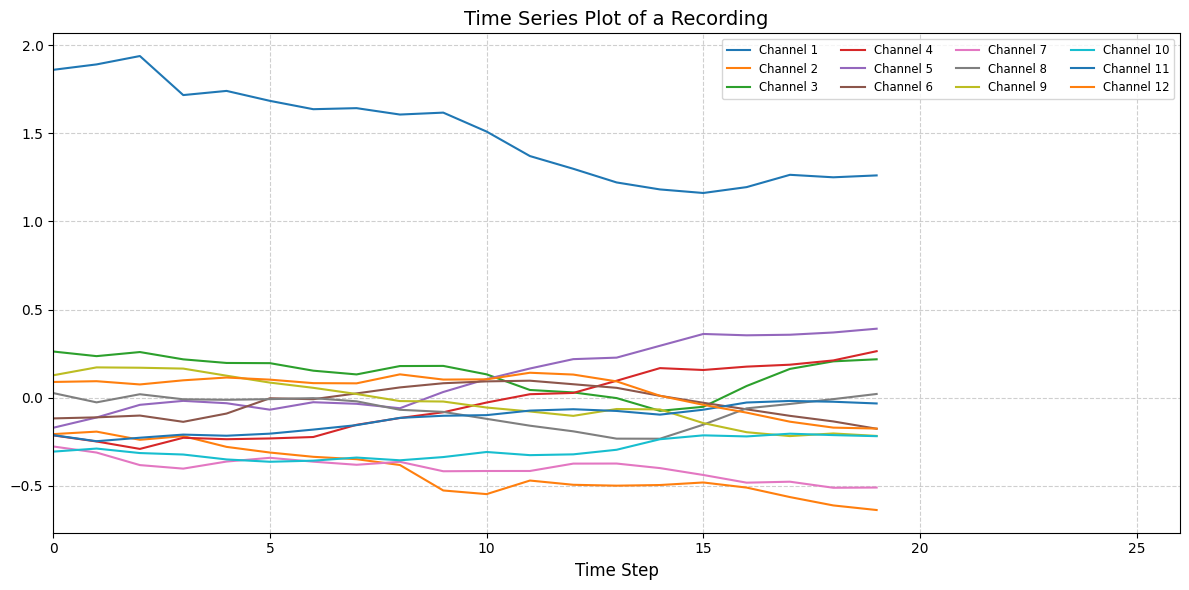

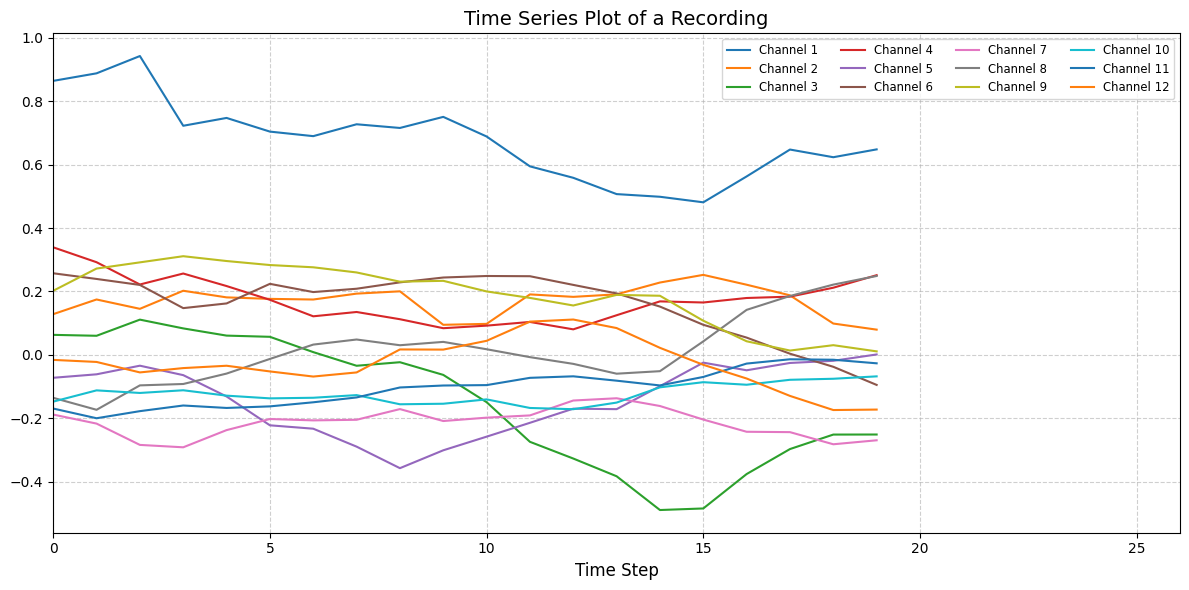

In [9]:
visualize_data_point(train_data[0])
normalize(train_data)
visualize_data_point(train_data[0])

In [10]:
flattend_data = np.array([train_data[idx].flatten() for idx in range(train_data.shape[0])])
flattend_data.shape

(270, 312)

In [ ]:
U, S, Vh = np.linalg.svd(flattend_data)
print(U.shape, S.shape, Vh.shape)

(270, 270) (270,) (312, 312)


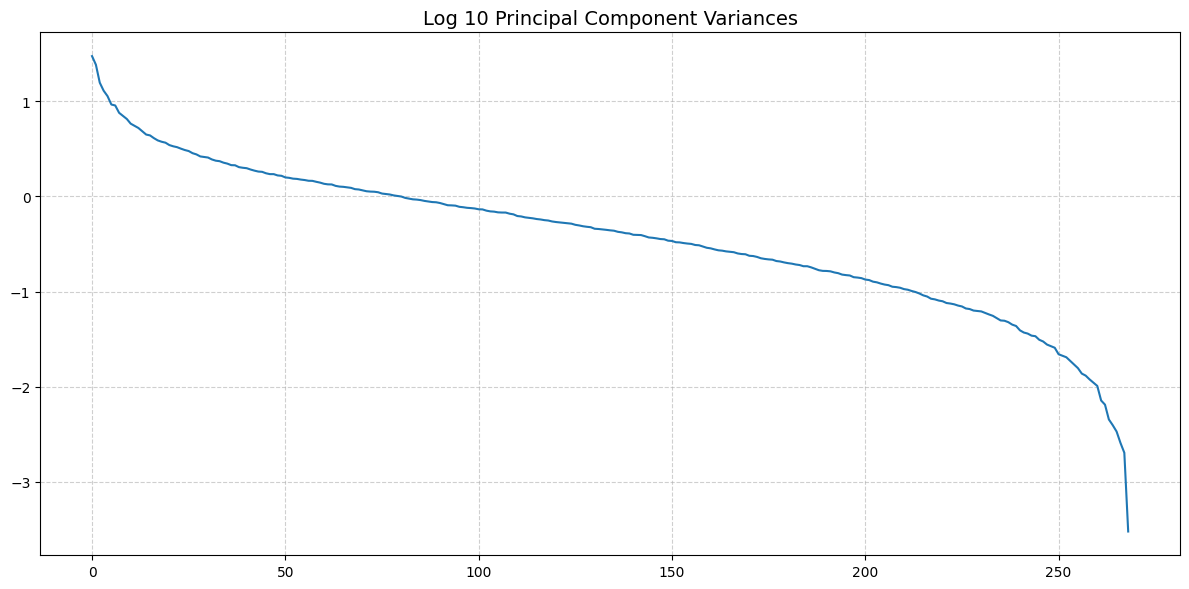

In [15]:
visualize_PC_variance(S[:-1], log=True)

In [17]:
cutoff = 200
preserved_variance = sum(S[:cutoff]) / sum (S)
preserved_variance

np.float64(0.9887822977909836)

In [19]:
U_reduced = U[:cutoff]
U_reduced.shape

(200, 270)